
# Stackoverflow Survey 2019

Each year, Stackoverflow conducts a developer survey designed to ask the developer community about everything from their favorite technologies to their job preferences. 2019 marks the ninth year they published the Annual Developer Survey results—with the largest number of respondents yet. Neqarly 90,000 developers took the 20-minute survey this past January.

Respondents were recruited primarily through channels owned by Stack Overflow. The top 5 sources of respondents were banner ads, email lists, house ad, blog posts, and Twitter. Since respondents were recruited in this way, highly engaged users on Stack Overflow were more likely to notice the links for the survey and click to begin it. Respondents who finished the survey were awarded a "Census" badge as a motivation to complete the survey.

I created a notbook based on the 2018 survey data, which introduced a few new topics ranging from artificial intelligence to ethics in coding. Here are a few of the top takeaways from the [2018 official results]:

The [2019 official results] are now available, with the data being made available soon after


- Python is the fastest-growing major programming language, and has risen in the ranks of programming languages in our survey yet again.
- Over half of respondents had written their first line of code by the time they were sixteen.
- DevOps specialists and site reliability engineers are among the highest paid, most experienced developers most satisfied with their jobs, and are looking for new jobs at the lowest levels.
- China has developers that are the most optimistic, believing that people born today will have a better life than their parents. Developers in Western European countries like France and Germany are among the least optimistic about the future.
- The data indicates that Stack Overflow saves a developer 30 to 90 minutes of time per week!.

And now, here is my take on the data.

[2018 official results]:(https://insights.stackoverflow.com/survey/2018)
[2019 official results]:(https://insights.stackoverflow.com/survey/2019)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from collections import defaultdict
%matplotlib inline

sns.set()
import warnings
warnings.filterwarnings('ignore')

In [37]:
survey = "Data\\2019_survey_results_public.csv"
surveyData = pd.read_csv(survey)
surveyData['CompTotal'] = pd.to_numeric(surveyData['CompTotal'],errors='coerce')
surveyData['DevType'].fillna('None',inplace=True)

Lets add some additional data to map the countries to regions, as we know the stack overflow commmunity is spread across the world.

In [38]:
countries = "Data\country mapping.csv"

countryData = pd.read_csv(countries,encoding = "ISO-8859-1")

In [39]:
df = surveyData.merge(countryData, left_on='Country', right_on='Country')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,Region,Hemisphere
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,Europe,Global North
1,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,Europe,Global North
2,76,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,32.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Neither easy nor difficult,Europe,Global North
3,80,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,24.0,Man,No,Straight / Heterosexual,Biracial,No,Appropriate in length,Neither easy nor difficult,Europe,Global North
4,82,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,NaN,Man,No,NaN,NaN,No,Too long,Neither easy nor difficult,Europe,Global North


# Australia

Lets look more local, and extract just the Australian's

## How are Australian's employed

In [40]:
Australia = df[df['Country'] == 'Australia'].reset_index()
total_Australians = Australia.shape[0]

print ('There were {} Australian respondents in the survey, which is {}% of the total population.'.
       format(total_Australians,round(total_Australians/df.shape[0]*100,2)))


There were 1903 Australian respondents in the survey, which is 2.19% of the total population.


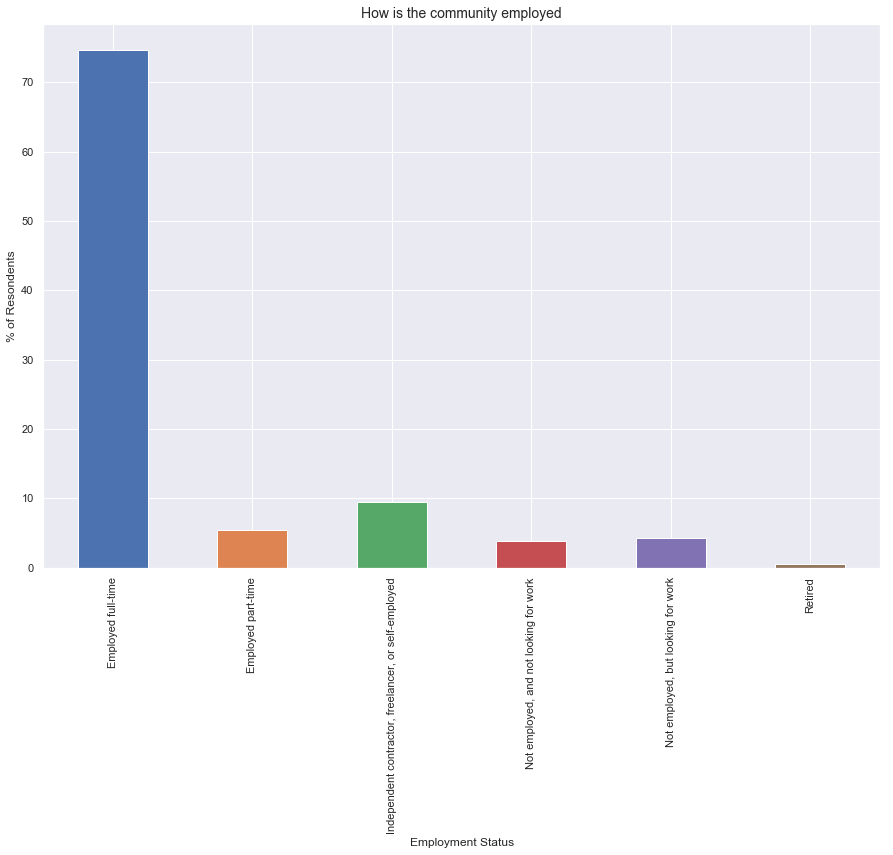

In [41]:

(Australia['Employment'].value_counts()/total_Australians*100).sort_index().plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Employment Status')
plt.ylabel('% of Resondents')
plt.title('How is the community employed', fontsize=14)
plt.show()

In [42]:
Australia.drop(['index'],axis=1,inplace=True)

## What developer roles do Australians do?

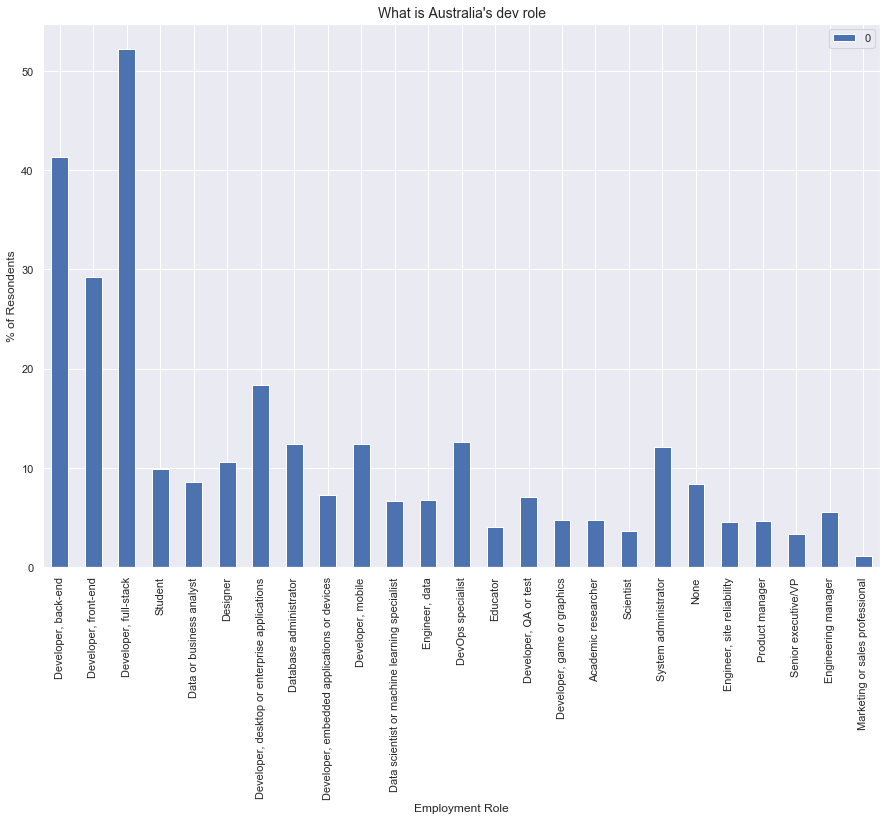

In [43]:
# Get list of lists of Type of Developers

devtype = [v.split(';') for v in Australia['DevType'].values]

# Convert all lists to a single list
devList = []

for d in devtype:
    for e in d:
        devList.append(e)

# Create a dictionary of number of listitem
b = {}
for item in devList:
    b[item] = b.get(item, 0) + 1

# Create a dataframe from dictionary
df_roles = pd.DataFrame(b, index=[0]).T

(df_roles/total_Australians*100).plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Employment Role')
plt.ylabel('% of Resondents')
plt.title("What is Australia's dev role", fontsize=14)
plt.show();

## How many Australian are employed in data roles?

In [44]:
Australia['CompFreq'][Australia['CompFreq'].isnull() == True] = 'Yearly'

Australia['yearlySalary'] = Australia['CompTotal']
Australia['yearlySalary'][Australia['CompFreq'] == 'Monthly'] = Australia['CompTotal']*12
Australia['yearlySalary'][Australia['CompFreq'] == 'Weekly'] = Australia['CompTotal']*52



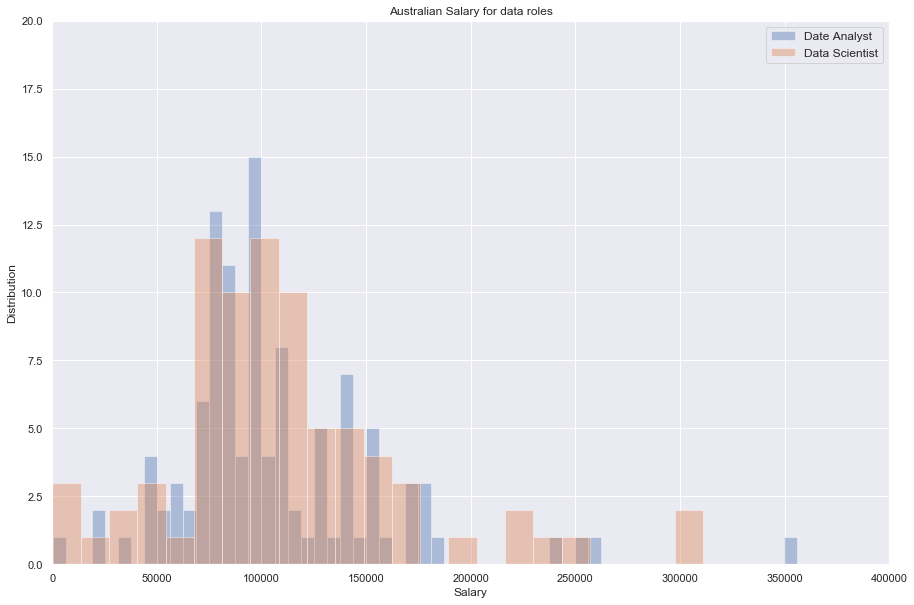

In [45]:
fig, ax = plt.subplots(figsize=(15, 10))

mask = Australia['DevType'].str.contains("Data or business analyst")
Data_Analyst = Australia[mask]
sns.distplot(Data_Analyst['yearlySalary'], bins=1000, kde=False, label='Date Analyst')

mask = Australia['DevType'].str.contains("Data scientist or machine learning specialist")
Data_Scientist = Australia[mask]
sns.distplot(Data_Scientist['yearlySalary'], bins=1000, kde=False,label='Data Scientist')

plt.legend(prop={'size': 12})
plt.title('Australian Salary for data roles')
plt.xlabel('Salary')
plt.ylabel('Distribution')
plt.xlim(0,400000);
plt.ylim(0,20);
plt.show()

In [46]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean, sem = np.mean(data), scipy.stats.sem(data)
    interval = sem * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, interval

In [47]:
# Ignore the obscene salaries greater than $300,000 and the ones less than $10,000 as
# these are liklely monthly salaries that werent labelled correctly or typos
Data_Analyst = Data_Analyst[(Data_Analyst['yearlySalary'] > 10000) & 
                            (Data_Analyst['yearlySalary'] < 400000)]
Data_Scientist = Data_Scientist[(Data_Scientist['yearlySalary'] > 10000) & 
                                (Data_Scientist['yearlySalary'] < 400000)]



DA_salary, DA_interval = mean_confidence_interval(Data_Analyst['yearlySalary'])
DS_salary, DS_interval = mean_confidence_interval(Data_Scientist['yearlySalary'])

print ("Average Data Analyst Salary: ${} ± ${}".format(round(DA_salary,2), round(DA_interval,2)))
print ("Average Data Scientist Salary: ${} ± ${}".format(round(DS_salary,2), round(DS_interval,2)))

Average Data Analyst Salary: $107644.97 ± $9189.8
Average Data Scientist Salary: $115734.8 ± $12616.18


## How many people are looking for work?

In [48]:
employment = Australia.groupby(by='Employment')['Respondent'].count()/total_Australians*100

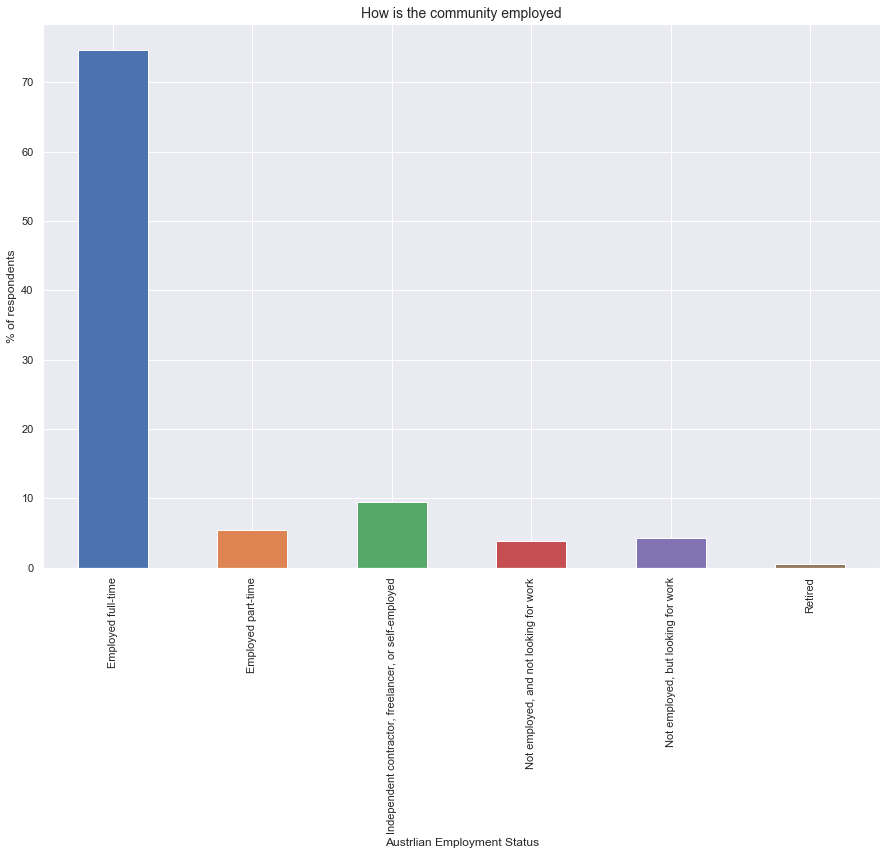

In [49]:
employment.plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Austrlian Employment Status')
plt.ylabel('% of respondents')
plt.title('How is the community employed', fontsize=14)
plt.show()

In [50]:
round(employment,2)

Employment
Employed full-time                                      74.67
Employed part-time                                       5.47
Independent contractor, freelancer, or self-employed     9.51
Not employed, and not looking for work                   3.78
Not employed, but looking for work                       4.26
Retired                                                  0.53
Name: Respondent, dtype: float64

As of 2018 Stackover flow survey, only 4.2% of respondands where looking for work.

# Global
Some more interesting questions about the global community follow:

## How many people code for fun?

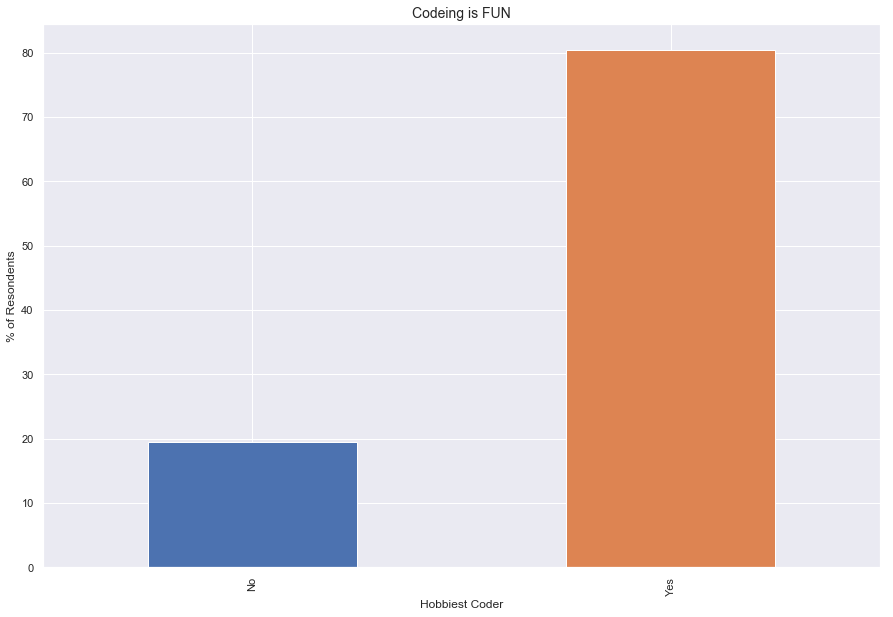

In [51]:
# How many people code for fun
total_respondents = df.shape[0]
(df['Hobbyist'].value_counts()/total_respondents*100).sort_index().plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Hobbiest Coder')
plt.ylabel('% of Resondents')
plt.title('Codeing is FUN', fontsize=14)
plt.show()

## How many people give back to the community through open source projects?

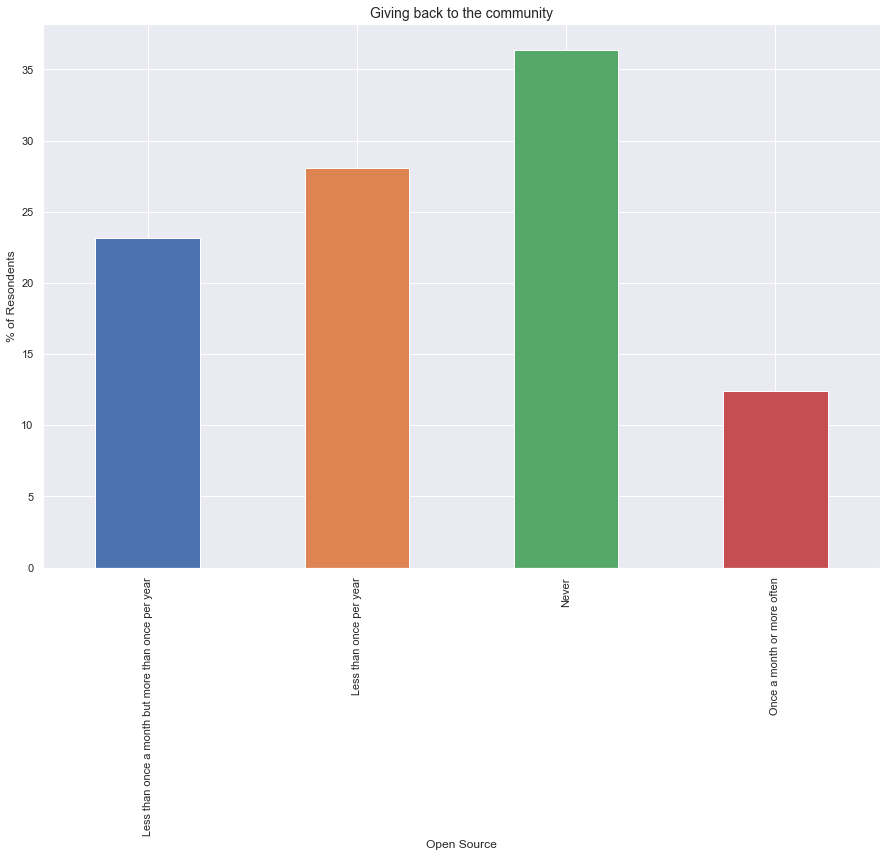

In [52]:
# How many contribute to open source
(df['OpenSourcer'].value_counts()/total_respondents*100).sort_index().plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Open Source')
plt.ylabel('% of Resondents')
plt.title('Giving back to the community', fontsize=14)
plt.show()

## Where is the Stackoverflow community situated?

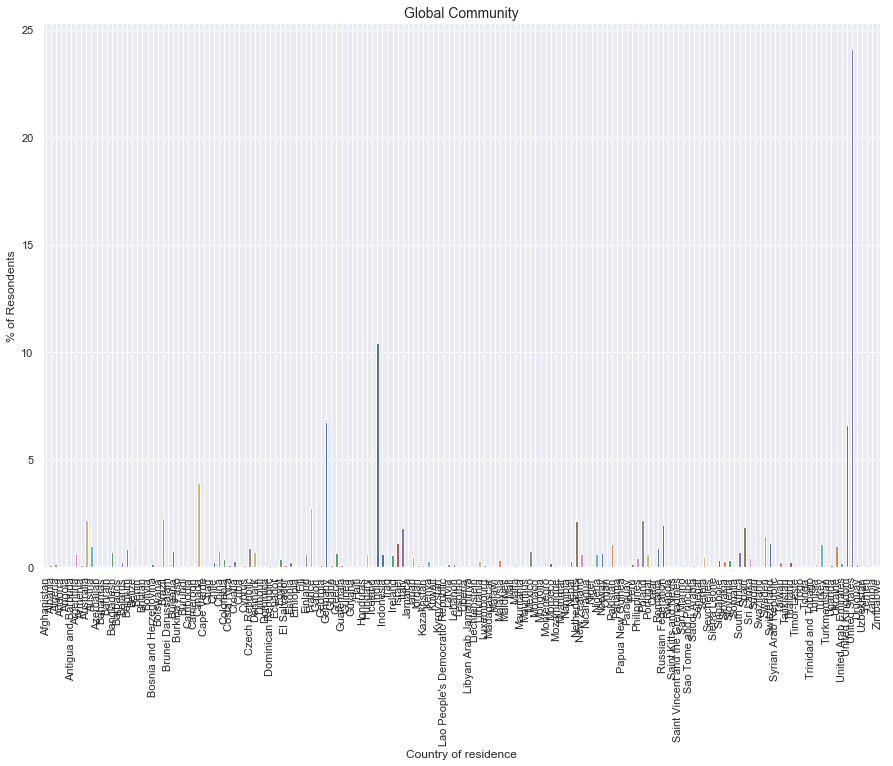

In [53]:
# Where does everyone come from
(df['Country'].value_counts().sort_index()/total_respondents*100).plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Country of residence')
plt.ylabel('% of Resondents')
plt.title('Global Community', fontsize=14)
plt.show()

That's a bit hard to see any value, so lets aggregate this to the regions/continent.

## What Continent is the Stackoverflow community living in?


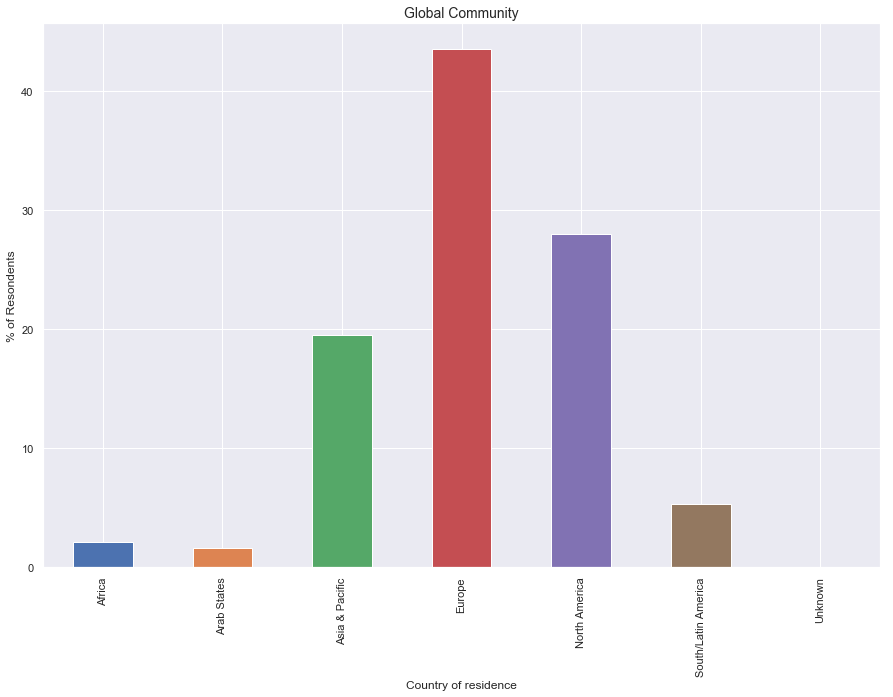

In [54]:
# Aggregating the countries to regions
(df['Region'].value_counts().sort_index()/total_respondents*100).plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Country of residence')
plt.ylabel('% of Resondents')
plt.title('Global Community', fontsize=14)
plt.show()

## How many people are studying?

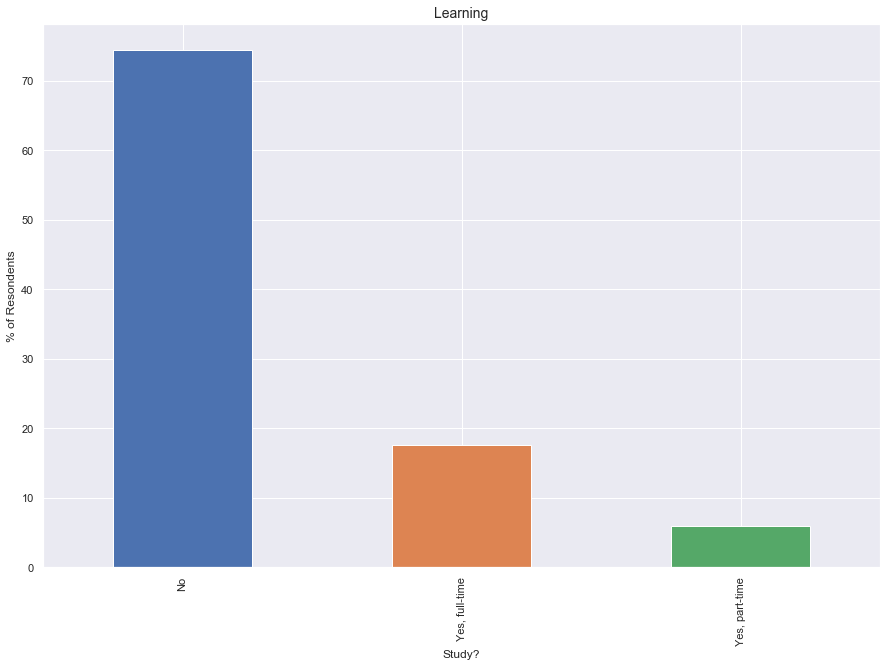

In [55]:
# How many are studying
(df['Student'].value_counts().sort_index()/total_respondents*100).plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Study?')
plt.ylabel('% of Resondents')
plt.title('Learning', fontsize=14)
plt.show()

## How is the stackoverflow employed?

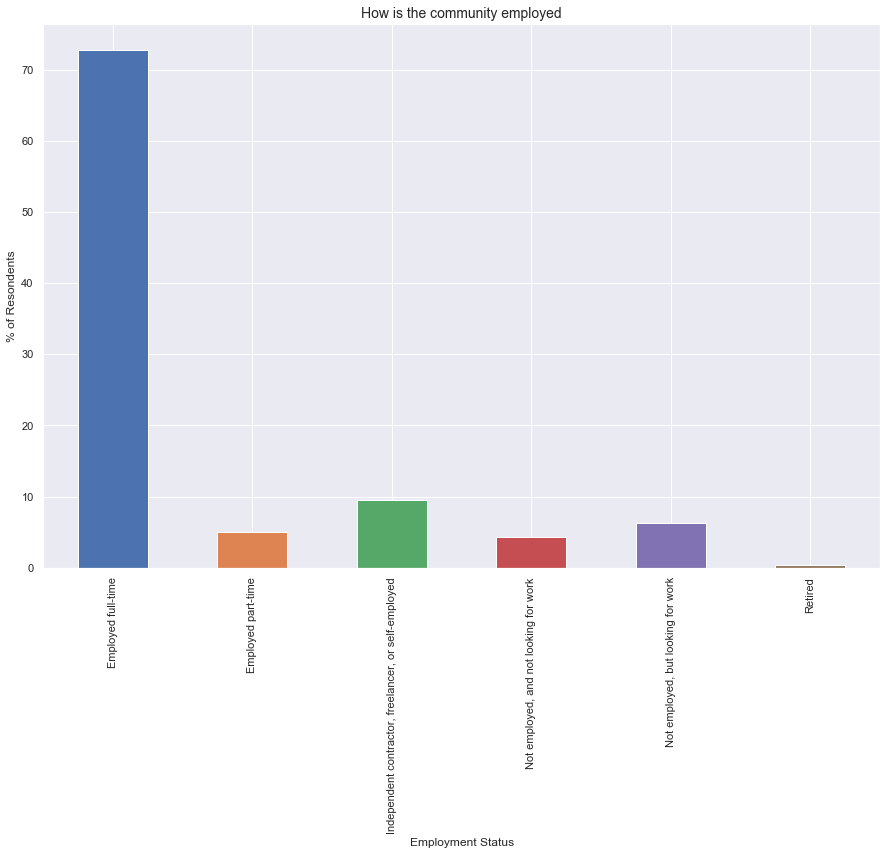

In [56]:
# How is everyone employed
(df['Employment'].value_counts()/total_respondents*100).sort_index().plot.bar(figsize=(15, 10), align='center')
plt.xlabel('Employment Status')
plt.ylabel('% of Resondents')
plt.title('How is the community employed', fontsize=14)
plt.show()